<a href="https://colab.research.google.com/github/MarcellinoHalim/Predicting_AALI_Stock/blob/main/AALI_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error

# Import Data

In [4]:
from google.colab import drive
df_hourly = pd.read_csv('/content/drive/MyDrive/sampeldata/sampel/AALIh.csv')

In [5]:
df_minutes = pd.read_csv('/content/drive/MyDrive/sampeldata/sampel/AALIm.csv')

In [6]:
df_daily = pd.read_csv('/content/drive/MyDrive/sampeldata/sampel/AALId.csv')

In [7]:
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])
df_hourly = df_hourly.set_index('timestamp')
print(f"Jumlah Baris = {df_hourly.shape[0]}")
df_hourly.head()

Jumlah Baris = 5677


,open,low,high,close,volume
timestamp,,,,,
2020-04-16 09:00:00,6700,6425,6700,6500,0
2020-04-16 10:00:00,6525,6450,6550,6450,425300
2020-04-16 11:00:00,6450,6400,6450,6425,303600
2020-04-16 12:00:00,6450,6400,6450,6425,0
2020-04-16 13:00:00,6400,6400,6475,6400,257000


In [8]:
df_hourly.tail()

,open,low,high,close,volume
timestamp,,,,,
2023-01-06 11:00:00,8050,8025,8050,8050,31900
2023-01-06 12:00:00,0,0,0,0,0
2023-01-06 13:00:00,8050,8025,8050,8050,34900
2023-01-06 14:00:00,8050,8000,8075,8075,92800
2023-01-06 15:00:00,8000,8000,8000,8000,10500


In [9]:
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])
df_daily = df_daily.set_index('timestamp')
print(f"Jumlah Baris = {df_daily.shape[0]}")
df_daily.head()

Jumlah Baris = 5670


,open,low,high,close,volume
timestamp,,,,,
2001-04-16,524,524,547,547,342131
2001-04-17,547,524,571,524,345804
2001-04-18,547,524,547,524,230361
2001-04-19,524,500,524,500,457574
2001-04-20,476,452,476,452,228262


In [10]:
df_daily.tail()

,open,low,high,close,volume
timestamp,,,,,
2023-01-02,8025,8000,8050,8050,336800
2023-01-03,8025,8025,8225,8225,1202900
2023-01-04,8200,8125,8375,8125,1040000
2023-01-05,8125,7900,8175,7925,1232100
2023-01-06,7900,7900,8075,8000,298200


In [11]:
# Menghitung jumlah data
df_daily.describe()

,open,low,high,close,volume
count,5670.000000,5670.000000,5670.000000,5670.000000,5.670000e+03
mean,12844.623986,12659.326455,13037.145326,12839.392416,2.289612e+06
std,7583.048855,7479.553526,7698.951972,7586.886296,4.282093e+06
min,452.000000,452.000000,452.000000,452.000000,0.000000e+00
25%,6527.000000,6407.750000,6654.750000,6550.000000,6.317220e+05
50%,12900.000000,12710.000000,13125.000000,12900.000000,1.301391e+06
75%,19390.000000,19057.000000,19724.000000,19390.000000,2.405018e+06
max,32587.000000,31634.000000,33635.000000,32396.000000,1.333713e+08


In [12]:
df_daily.count()

,0
open,5670
low,5670
high,5670
close,5670
volume,5670


In [13]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5670 entries, 2001-04-16 to 2023-01-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   open    5670 non-null   int64
 1   low     5670 non-null   int64
 2   high    5670 non-null   int64
 3   close   5670 non-null   int64
 4   volume  5670 non-null   int64
dtypes: int64(5)
memory usage: 265.8 KB


In [14]:
df_daily.isnull()

,open,low,high,close,volume
timestamp,,,,,
2001-04-16,False,False,False,False,False
2001-04-17,False,False,False,False,False
2001-04-18,False,False,False,False,False
2001-04-19,False,False,False,False,False
2001-04-20,False,False,False,False,False
...,...,...,...,...,...
2023-01-02,False,False,False,False,False
2023-01-03,False,False,False,False,False
2023-01-04,False,False,False,False,False


In [15]:
df_daily.duplicated()

,0
timestamp,
2001-04-16,False
2001-04-17,False
2001-04-18,False
2001-04-19,False
2001-04-20,False
...,...
2023-01-02,False
2023-01-03,False
2023-01-04,False


# Visualisasi

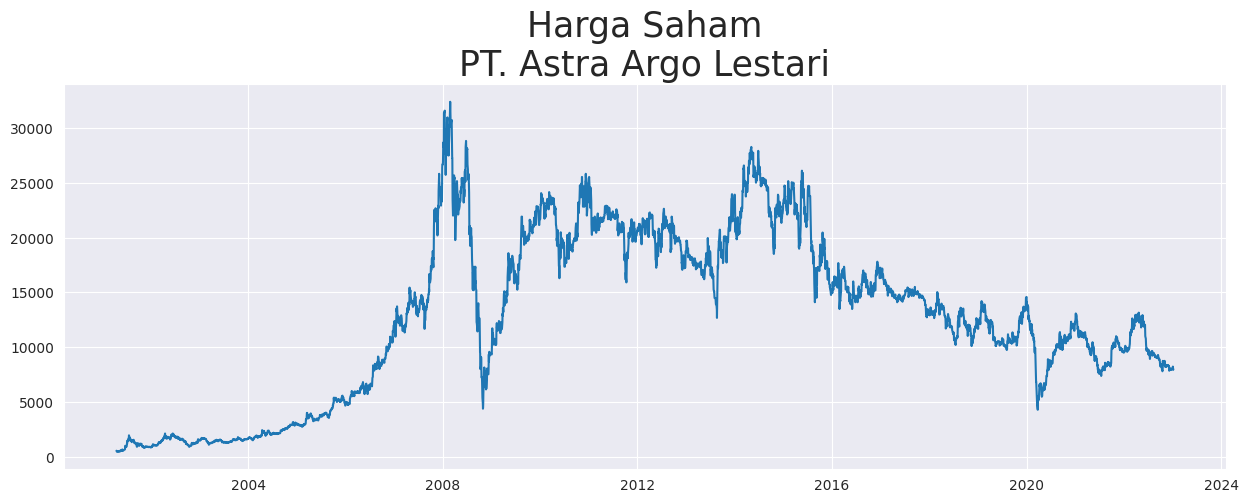

In [16]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df_daily.index, df_daily['close'])
plt.title("Harga Saham\nPT. Astra Argo Lestari", fontsize=25)
plt.show()

# Transformasi

In [17]:
ms = MinMaxScaler()
df_daily['close'] = ms.fit_transform(df_daily[['close']])

# Split Data

In [18]:
def split_data(df_daily, train_size):
  size = int(len(df_daily) * train_size)
  train, test = df_daily.iloc[0:size], df_daily.iloc[size:len(df_daily)]
  return train, test

In [19]:
train, test = split_data(df_daily['close'], 0.8) #80% Train

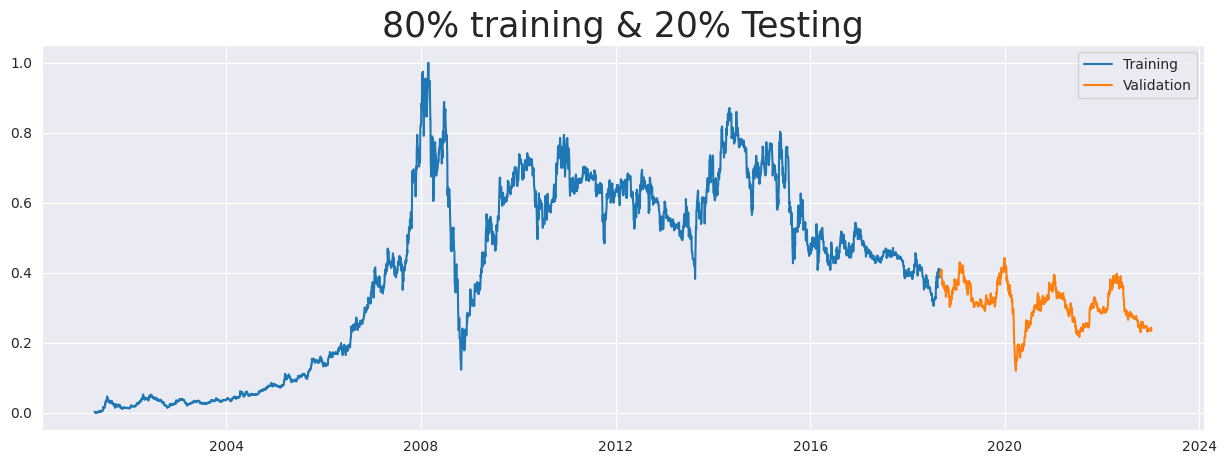

In [20]:
train, test = split_data(df_daily['close'], 0.8) #80% Train
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Validation'])
plt.title('80% training & 20% Testing', fontsize=25)
plt.show()

In [21]:
def split_target(df_daily, look_back=1):
    X, y = [], []
    for i in range(len(df_daily) - look_back):
        a = df_daily[i:(i + look_back), 0]
        X.append(a)
        y.append(df_daily[i + look_back, 0])
    return np.array(X), np.array(y)

In [22]:
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [23]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build Model


In [24]:
model = Sequential([LSTM(100, input_shape=(1, 1), return_sequences=True),
                    LSTM(50),
                    Dense(25, activation='relu'),
                    Dense(1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.015:
      self.model.stop_training = True

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              metrics=["mae"],
              loss=tf.keras.losses.Huber())

# Training Model

In [27]:
history = model.fit(X_train,
                    y_train,
                    epochs=2000,
                    batch_size=128,
                    validation_data=(X_test, y_test),
                    shuffle=False,
                    callbacks=[Callback()])

Epoch 1/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0596 - mae: 0.2267 - val_loss: 0.0443 - val_mae: 0.2923
Epoch 2/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0557 - mae: 0.2118 - val_loss: 0.0398 - val_mae: 0.2764
Epoch 3/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0520 - mae: 0.2003 - val_loss: 0.0350 - val_mae: 0.2587
Epoch 4/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0480 - mae: 0.1937 - val_loss: 0.0300 - val_mae: 0.2386
Epoch 5/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0437 - mae: 0.1900 - val_loss: 0.0247 - val_mae: 0.2153
Epoch 6/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mae: 0.1870 - val_loss: 0.0191 - val_mae: 0.1881
Epoch 7/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0346 - mae: 0.1850 - val_loss: 0.0137 - val_mae: 0.1570
Epoch 8/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0300 - mae: 0.1837 - val_loss: 0.0086 - val_mae: 0.1221
Epoch 9/2000
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - 

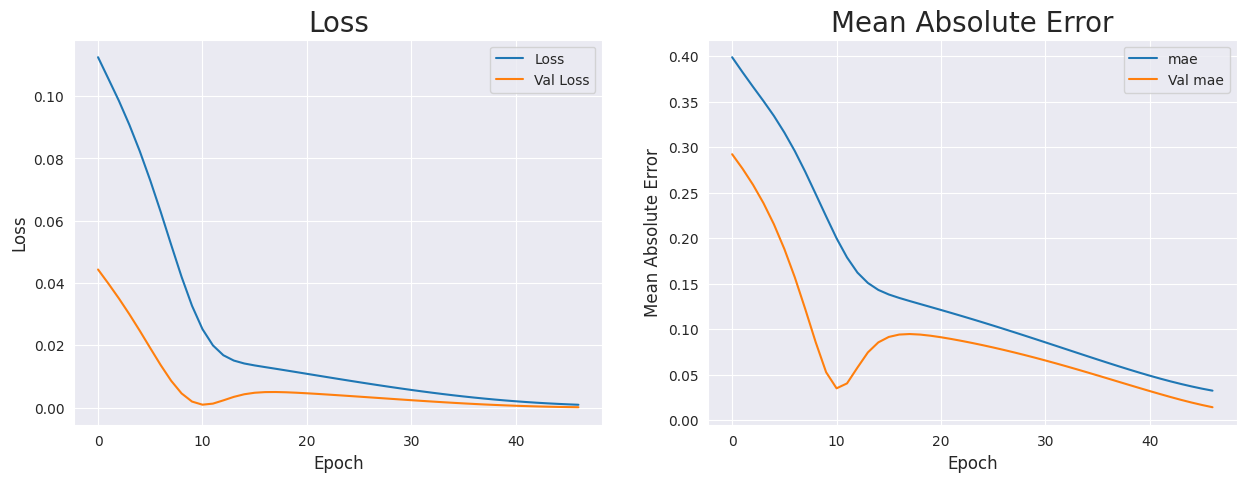

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss','Val Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MAE
ax2.plot(history.history['mae'])
ax2.plot(history.history['val_mae'])
ax2.legend(['mae','Val mae'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Absolute Error', fontsize=12)
ax2.set_title('Mean Absolute Error', fontsize=20)
plt.show()

# Predict

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


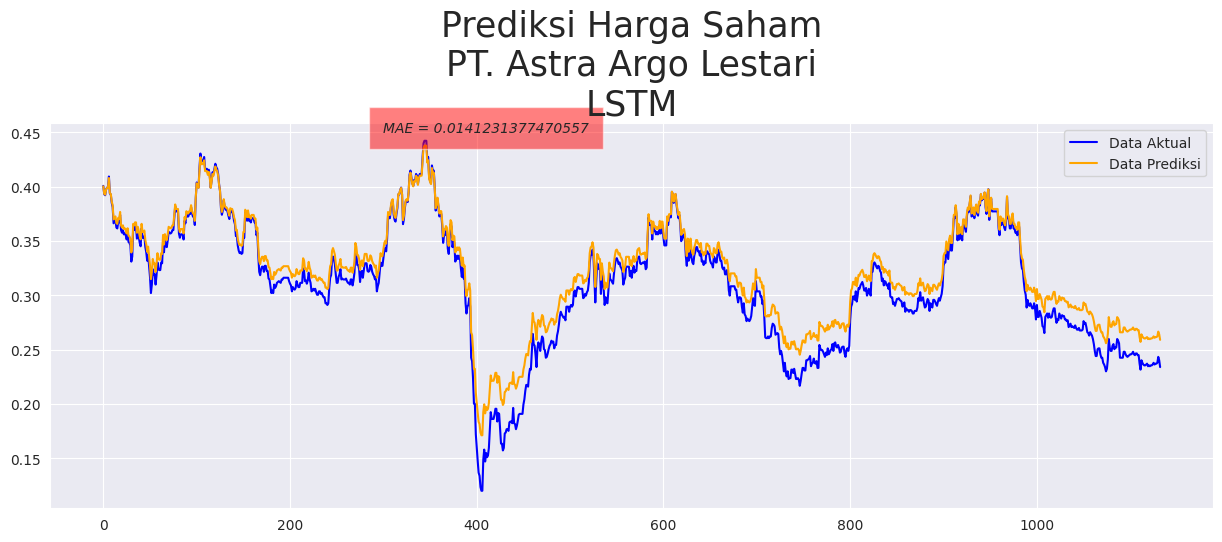

In [29]:
plt.figure(figsize=(15,5))
y_pred = model.predict(X_test)
y_pred = list(np.reshape(y_pred, (1,len(y_pred)))[0])

X_test = np.reshape(X_test, (len(X_test),1))
X_test = list(np.reshape(X_test, (1,len(X_test)))[0])

plt.plot(X_test, label='Data Aktual', color='blue')
plt.plot(y_pred, label='Data Prediksi', color='orange')
plt.text(300, 0.45, f"MAE = {mean_absolute_error(y_test, y_pred)}", style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.title('Prediksi Harga Saham\nPT. Astra Argo Lestari\nLSTM', fontsize=25)
plt.legend()
plt.show()